# Synopsis

Create word embeddings with novel data using word2vec. Visualize with tSNE.

# Configuration

In [195]:
proj = '/Users/rca2t/Dropbox/Courses/DSI/DS5559/UVA_DSI_REPO'
pwd = '{}/play/wordembedding'.format(proj)
db_file = "{}/data/novels.db".format(proj)
lib = "{}/lib".format(proj)

# Libraries

In [196]:
import pandas as pd
import numpy as np
import sqlite3
import sys; sys.path.append(lib)
from textman import textman as tx

import sys
from gensim.models import word2vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Pragmas

In [197]:
%matplotlib inline

# Process

## Import tokens and convert to a corpus for Gensim

In [58]:
OHCO = ['genre','author','book','chapter','para_num','sent_num']
tokens = tx.get_table('token', db_file)
tokens = tokens[~tokens.term_str.isna()]
corpus = tokens.groupby(OHCO).term_str.apply(lambda  x:  x.tolist())\
    .reset_index()['term_str'].tolist()

In [59]:
corpus[:5]

[['the', 'young', 'adventurers', 'ltd'],
 ['tommy', 'old', 'thing'],
 ['tuppence', 'old', 'bean'],
 ['the',
  'two',
  'young',
  'people',
  'greeted',
  'each',
  'other',
  'affectionately',
  'and',
  'momentarily',
  'blocked',
  'the',
  'dover',
  'street',
  'tube',
  'exit',
  'in',
  'doing',
  'so'],
 ['the', 'adjective', 'old', 'was', 'misleading']]

## Generate word embeddings with Gensim's library

In [66]:
model = word2vec.Word2Vec(corpus, size=246, window=5, min_count=200, workers=4)

## Visualize with tSNE

### Generate coordinates to plot

In [173]:
coords = pd.DataFrame(index=range(len(model.wv.vocab)))
coords['label'] = [w for w in model.wv.vocab]
coords['vector'] = coords['label'].apply(lambda x: model.wv.get_vector(x))

### Use ScikitLearn's TSNE library

In [187]:
tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
tsne_values = tsne_model.fit_transform(coords['vector'].tolist())

In [188]:
coords['x'] = tsne_values[:,0]
coords['y'] = tsne_values[:,1]

In [189]:
coords.head()

,label,vector,x,y
0,the,"[-0.23068611, -0.08423757, -0.040307105, -0.11...",-11.729174,20.028599
1,young,"[0.7129626, -0.4649732, 0.21992496, 0.15638597...",-4.677946,-18.595600
2,tommy,"[0.09296865, -0.22020021, 0.3578044, 0.1319354...",0.083997,-12.991136
3,old,"[0.0044123284, -0.3132949, 0.18095231, -0.2681...",-4.622373,-18.579782
4,thing,"[-0.34345496, -0.03282921, 0.33316037, 0.58749...",12.209940,7.111853


### Plot the coordinates

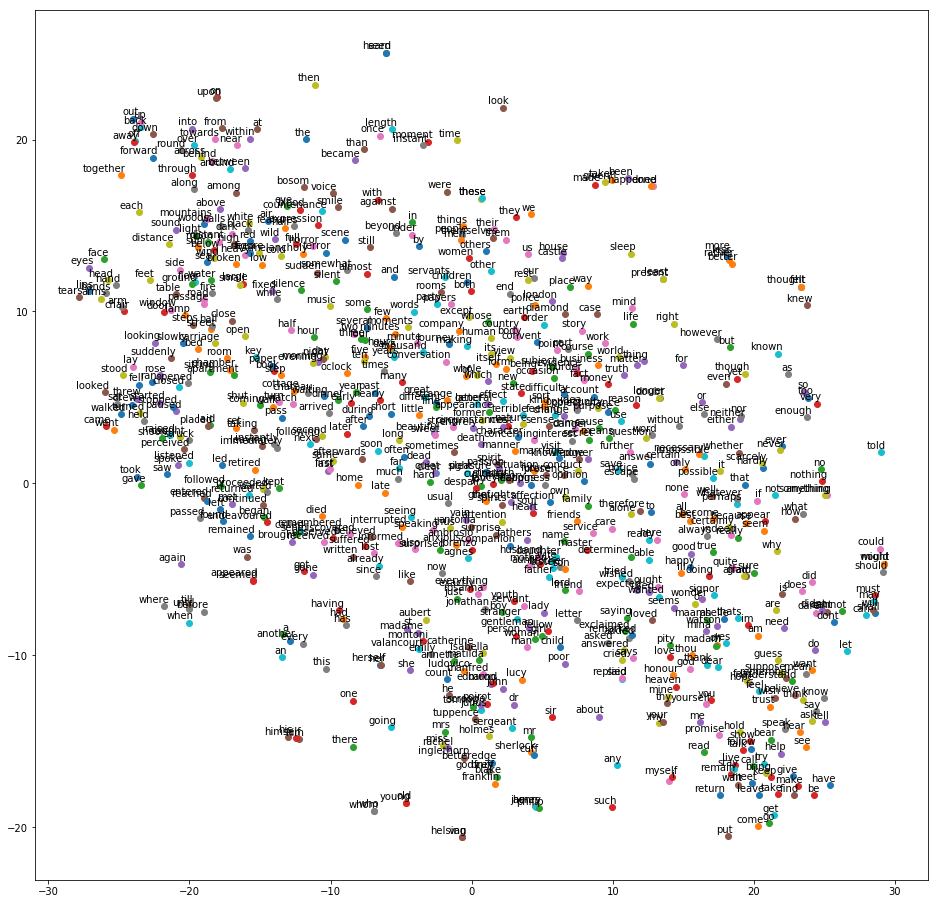

In [190]:
plt.figure(figsize=(16, 16)) 
for i in range(len(coords)):
    plt.scatter(coords.x[i],coords.y[i])
    plt.annotate(word_labels[i],
                 xy=(coords.x[i], coords.y[i]),
                 xytext=(5, 2),
                 textcoords='offset points',
                 ha='right',
                 va='bottom')
plt.show()